In [31]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input


In [32]:
import pandas as pd
from rbf.rbflayer import InitCentersKMeans, RBFLayer
df = pd.read_csv(r'banknotes.txt',sep=',')
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('class',axis=1),df['class'])

In [34]:
model = Sequential()
initializer = InitCentersKMeans(X_train)
rbflayer = RBFLayer(10,
                    initializer=InitCentersKMeans(X_train),
                    betas=2.0,
                    input_shape=(1,))
outputlayer = Dense(2, activation="softmax")
input_ = Input(shape=X_train.shape[1:])

model.add(input_)
model.add(rbflayer)
model.add(outputlayer)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [35]:
model.fit(X_train, y_train,
              batch_size=100,
              epochs=300,
              verbose=2)

Epoch 1/300
11/11 - 0s - loss: 0.6915 - accuracy: 0.5598
Epoch 2/300
11/11 - 0s - loss: 0.6905 - accuracy: 0.5520
Epoch 3/300
11/11 - 0s - loss: 0.6894 - accuracy: 0.5520
Epoch 4/300
11/11 - 0s - loss: 0.6885 - accuracy: 0.5559
Epoch 5/300
11/11 - 0s - loss: 0.6876 - accuracy: 0.5578
Epoch 6/300
11/11 - 0s - loss: 0.6870 - accuracy: 0.5598
Epoch 7/300
11/11 - 0s - loss: 0.6862 - accuracy: 0.5607
Epoch 8/300
11/11 - 0s - loss: 0.6857 - accuracy: 0.5607
Epoch 9/300
11/11 - 0s - loss: 0.6852 - accuracy: 0.5607
Epoch 10/300
11/11 - 0s - loss: 0.6847 - accuracy: 0.5607
Epoch 11/300
11/11 - 0s - loss: 0.6843 - accuracy: 0.5607
Epoch 12/300
11/11 - 0s - loss: 0.6840 - accuracy: 0.5607
Epoch 13/300
11/11 - 0s - loss: 0.6836 - accuracy: 0.5607
Epoch 14/300
11/11 - 0s - loss: 0.6833 - accuracy: 0.5607
Epoch 15/300
11/11 - 0s - loss: 0.6829 - accuracy: 0.5607
Epoch 16/300
11/11 - 0s - loss: 0.6826 - accuracy: 0.5607
Epoch 17/300
11/11 - 0s - loss: 0.6823 - accuracy: 0.5607
Epoch 18/300
11/11 - 0s

In [36]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 786us/step - loss: 0.0459 - accuracy: 0.9942


[0.045903924852609634, 0.9941691160202026]

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test).argmax(axis=1)
conf = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

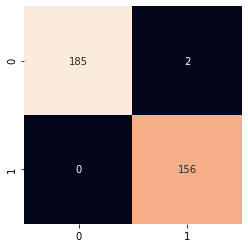

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns 
f,ax = plt.subplots(1, 1)

sns.heatmap(conf,square=True, annot=True, cbar=False,fmt='d',ax=ax)

In [39]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)

In [40]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       187
           1       0.99      1.00      0.99       156

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

